In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import calendar

**Loading the dataset**

In [7]:
d= pd.read_csv("/kaggle/input/ajith-kumar/Unemployment_Rate_upto_11_2020.csv")
d.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [8]:
d.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


**Changing the column names**

In [11]:
d.columns = ['States', 'Date', 'Frequency', 'Estimated_Unemployment_Rate', 'Estimated_Employed',
             'Estimated_Labour_Participation_Rate', 'Region', 'Longitude', 'Latitude']
d.head()  

,States,Date,Frequency,Estimated_Unemployment_Rate,Estimated_Employed,Estimated_Labour_Participation_Rate,Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [12]:
def has_extra_spaces(cell):
    if isinstance(cell, str):
        return ' ' in cell
    return False
has_extra_spaces_d = d.applymap(has_extra_spaces).sum()
print(has_extra_spaces_d)

States                                  69
Date                                   267
Frequency                              267
Estimated_Unemployment_Rate              0
Estimated_Employed                       0
Estimated_Labour_Participation_Rate      0
Region                                   0
Longitude                                0
Latitude                                 0
dtype: int64


In [14]:
d['States'].value_counts()

States
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

In [15]:
d['Frequency'].value_counts()

Frequency
 M    267
Name: count, dtype: int64

In [16]:
d['Date'].value_counts()

Date
 31-03-2020    27
 31-05-2020    27
 30-06-2020    27
 31-07-2020    27
 31-08-2020    27
 30-09-2020    27
 31-10-2020    27
 31-01-2020    26
 29-02-2020    26
 30-04-2020    26
Name: count, dtype: int64

In [19]:
d[['Date', 'Frequency']] = d[['Date', 'Frequency']].apply(lambda x: x.str.replace(' ', ''))
d.head()

,States,Date,Frequency,Estimated_Unemployment_Rate,Estimated_Employed,Estimated_Labour_Participation_Rate,Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [20]:
has_extra_spaces_d= d.applymap(has_extra_spaces).sum()
print(has_extra_spaces_d)

States                                 69
Date                                    0
Frequency                               0
Estimated_Unemployment_Rate             0
Estimated_Employed                      0
Estimated_Labour_Participation_Rate     0
Region                                  0
Longitude                               0
Latitude                                0
dtype: int64


In [22]:
d['Date'] = pd.to_datetime(d['Date'])
print(d['Date'].dtypes) 

datetime64[ns]


In [23]:
d['Month'] = d['Date'].dt.month.apply(lambda x: calendar.month_name[x])
d.head()

,States,Date,Frequency,Estimated_Unemployment_Rate,Estimated_Employed,Estimated_Labour_Participation_Rate,Region,Longitude,Latitude,Month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,January
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,February
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,March
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,April
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,May


In [24]:
round(d[['Estimated_Unemployment_Rate', 'Estimated_Employed',
             'Estimated_Labour_Participation_Rate']].describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated_Unemployment_Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated_Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated_Labour_Participation_Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


**Correlation**

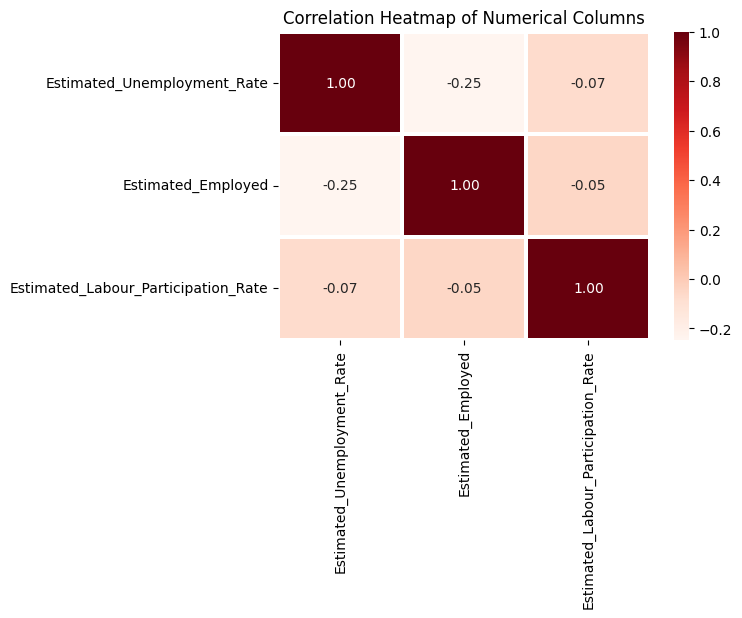

In [28]:
numerical_columns = ['Estimated_Unemployment_Rate','Estimated_Employed','Estimated_Labour_Participation_Rate']
correlation_matrix = d[numerical_columns].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidth=1.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

**Exploratory Data Analysis**

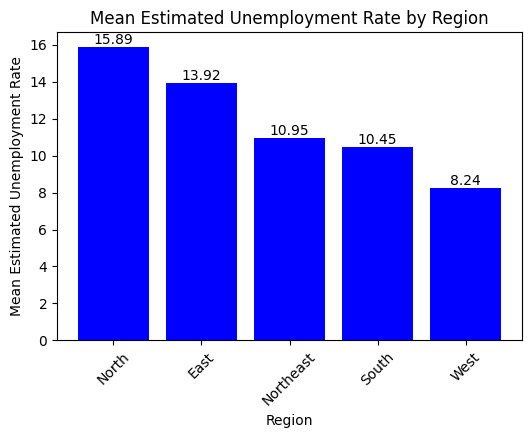

In [29]:
region_means = d.groupby('Region')['Estimated_Unemployment_Rate'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
plt.bar(region_means.index, region_means.values, color='blue')
plt.title('Mean Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Unemployment Rate')
plt.xticks(rotation=45)
for i, v in enumerate(region_means.values):
    plt.annotate(f'{v:.2f}',(i, v), ha='center',va='bottom')
plt.show()

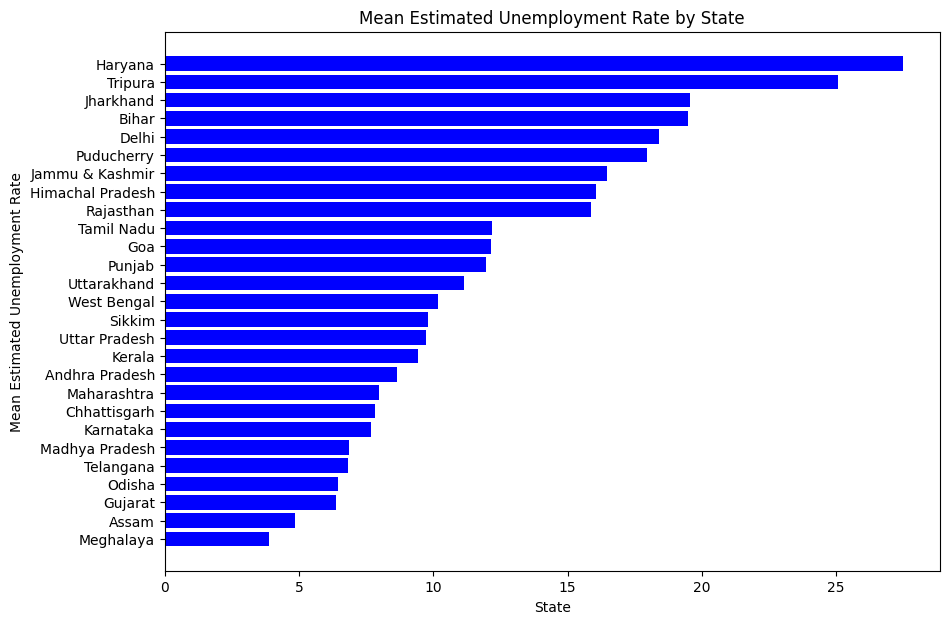

In [30]:
state_means = d.groupby('States')['Estimated_Unemployment_Rate'].mean().sort_values(ascending=True)
plt.figure(figsize=(10, 7))
plt.barh(state_means.index, state_means.values, color='blue')
plt.title('Mean Estimated Unemployment Rate by State')
plt.xlabel('State')
plt.ylabel('Mean Estimated Unemployment Rate')
plt.show()

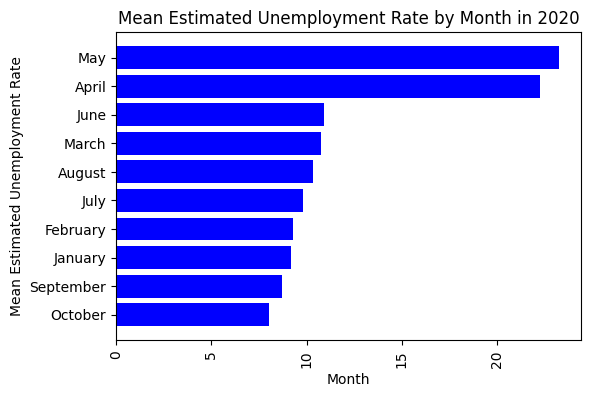

In [32]:
Date_means = d.groupby("Month")['Estimated_Unemployment_Rate'].mean().sort_values(ascending=True)
plt.figure(figsize=(6,4))
plt.barh(Date_means.index, Date_means.values, color='blue')
plt.title("Mean Estimated Unemployment Rate by Month in 2020")
plt.xlabel("Month")
plt.ylabel("Mean Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.show()

**Analysing Estimated Employed**

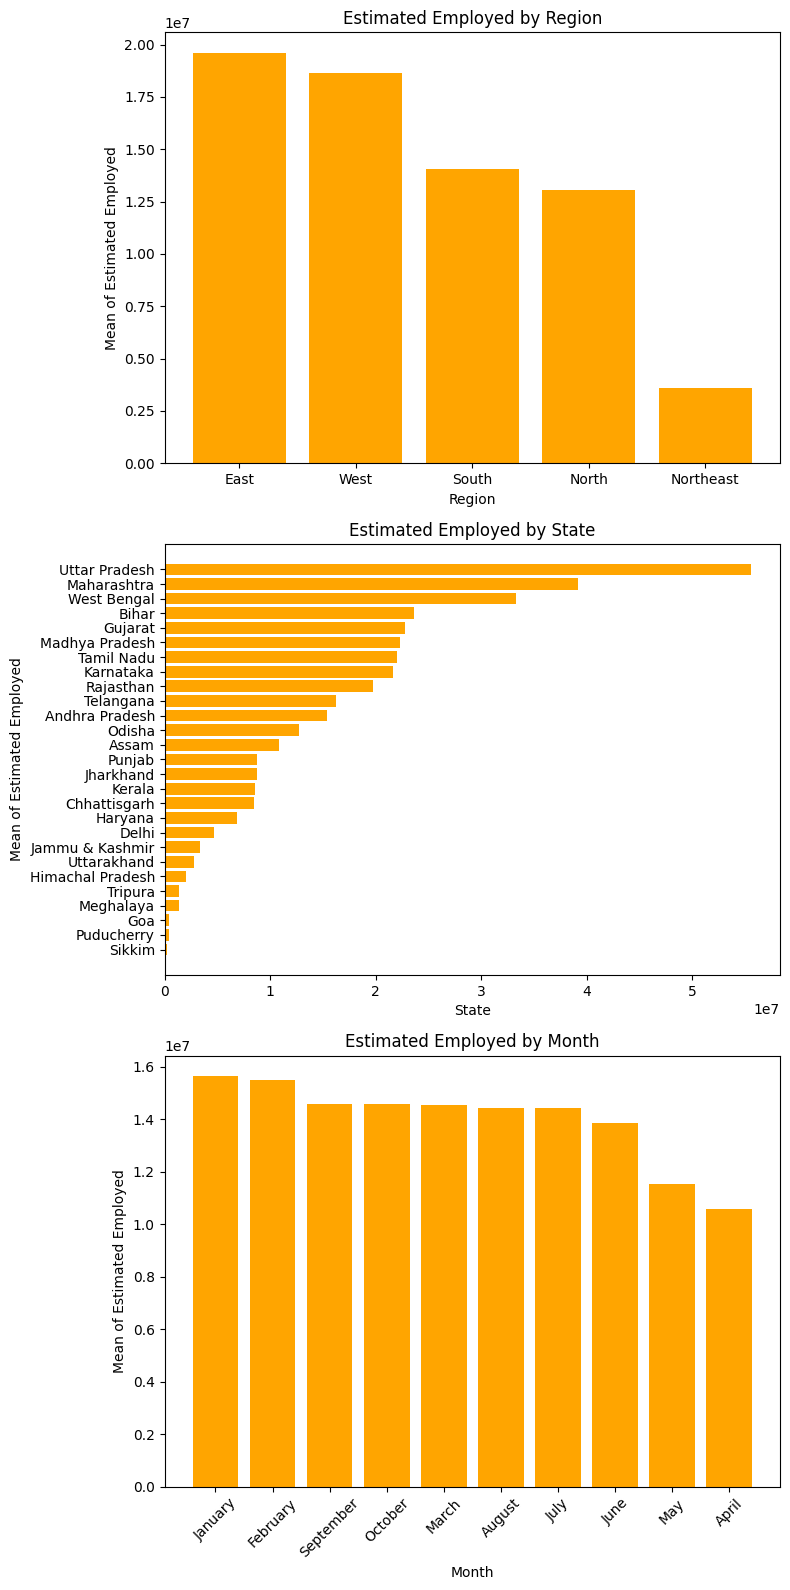

In [35]:
EE_region = d.groupby('Region')['Estimated_Employed'].mean().sort_values(ascending=False)
EE_state = d.groupby('States')['Estimated_Employed'].mean().sort_values(ascending=True)
EE_month = d.groupby('Month')['Estimated_Employed'].mean().sort_values(ascending=False)
fig, axes = plt.subplots(3,1,figsize=(8, 16))
axes[0].bar(EE_region.index,EE_region.values,color='orange')
axes[0].set_title("Estimated Employed by Region")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Mean of Estimated Employed")
axes[1].barh(EE_state.index,EE_state.values, color='orange')
axes[1].set_title("Estimated Employed by State")
axes[1].set_xlabel("State")
axes[1].set_ylabel("Mean of Estimated Employed")
axes[2].bar(EE_month.index,EE_month.values,color='orange')
axes[2].set_title("Estimated Employed by Month")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Mean of Estimated Employed")
axes[2].tick_params(axis='x',rotation=45)
plt.tight_layout()
plt.show()